In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("archive (13).zip")

In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

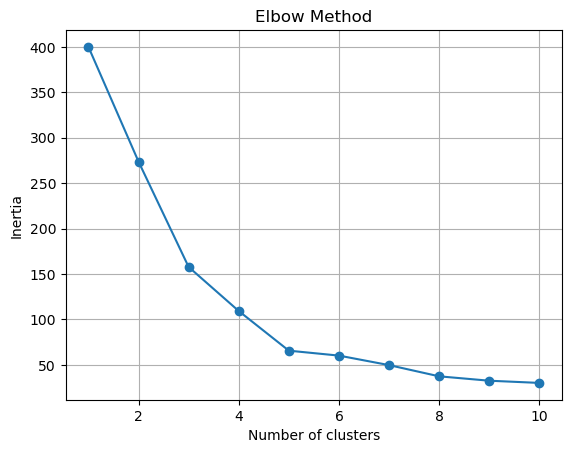

In [9]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)


In [13]:
df['Cluster'] = labels


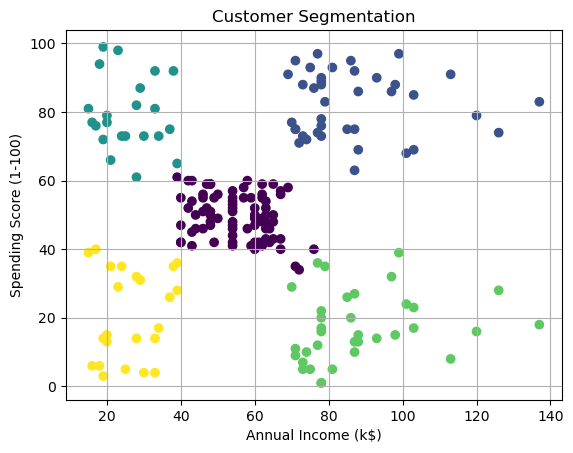

In [15]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.grid(True)
plt.show()

In [17]:
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", round(score, 2))


Silhouette Score: 0.55
